In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# Upload the dataset
from google.colab import files
print("Please upload the Network Intrusion Detection dataset from Kaggle")
uploaded = files.upload()  # Upload the dataset file

# Load the dataset
# The filename might be different - adjust as needed
filename = list(uploaded.keys())[0]
df_original = pd.read_csv(filename)

# Display basic information about the dataset
print("\nOriginal Dataset Preview:")
print(df_original.head())
print("\nShape:", df_original.shape)
print("\nColumns:", df_original.columns.tolist())

Please upload the Network Intrusion Detection dataset from Kaggle


Saving Test_data.csv to Test_data.csv
Saving Train_data.csv to Train_data.csv

Original Dataset Preview:
   duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0               0       0    0  ...             255                  10   
1               0       0    0  ...             255                   1   
2               0       0    0  ...             134                  86   
3               0       0    0  ...               3                  57   
4               0       0    0  ...              29                  86   

   ds

In [6]:
# L07: IIoT Network Analysis: Age of Information and Reliability Trade-offs
# Simple approach in Google Colab for AoI prediction

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# 2. Upload and Load Dataset
print("Please upload iiot_network_data.csv")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Display basic information
print("\nDataset Preview:")
print(df.head())
print("\nShape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# 3. Data Exploration and Visualization
# Assume columns: 'age_of_information', 'transmission_probability', 'traffic_type', 'packet_loss_probability', etc.
# Adjust these based on actual columns if different
aoi_col = 'age_of_information'  # Target variable
features = ['transmission_probability', 'packet_loss_probability', 'network_load']  # Example features
traffic_col = 'traffic_type'

# Verify columns exist
for col in [aoi_col, traffic_col] + features:
    if col not in df.columns:
        print(f"Error: '{col}' not found. Available columns:", df.columns.tolist())
        raise KeyError(f"Please check column names in dataset.")

# Visualization 1: Scatter plot of transmission_probability vs age_of_information
plt.figure()
sns.scatterplot(data=df, x='transmission_probability', y='age_of_information', hue='traffic_type')
plt.title('Transmission Probability vs Age of Information')
plt.xlabel('Transmission Probability')
plt.ylabel('Age of Information')
plt.savefig('scatter_plot.png')
plt.show()

# Visualization 2: Box plot of age_of_information by traffic_type
plt.figure()
sns.boxplot(data=df, x='traffic_type', y='age_of_information')
plt.title('Age of Information by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Age of Information')
plt.savefig('box_plot.png')
plt.show()

# Visualization 3: Correlation heatmap
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure()
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('heatmap.png')
plt.show()

# 4. Machine Learning Model Development
# Prepare data
X = df[features]  # Features
y = df[aoi_col]   # Target (AoI)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure()
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance for AoI Prediction')
plt.savefig('feature_importance.png')
plt.show()

# 5. Hypothetical Predictions
# Create 3 new configurations (adjust values based on your data ranges)
new_configs = pd.DataFrame([
    [0.5, 0.1, 0.3],  # Config 1
    [0.8, 0.05, 0.5],  # Config 2
    [0.2, 0.2, 0.7]   # Config 3
], columns=features)
new_configs_scaled = scaler.transform(new_configs)
predictions = rf.predict(new_configs_scaled)
print("\nHypothetical Predictions:")
for i, pred in enumerate(predictions):
    print(f"Config {i+1}: Predicted AoI = {pred:.4f}")

# 6. Save Results for Report
results = {
    'MSE': mse,
    'R-squared': r2,
    'Feature Importance': feature_importance.to_dict(),
    'Hypothetical Predictions': predictions.tolist()
}
print("\nResults for report:")
print(results)

Please upload iiot_network_data.csv


Saving Test_data.csv to Test_data (1).csv
Saving Train_data.csv to Train_data (1).csv

Dataset Preview:
   duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0               0       0    0  ...             255                  10   
1               0       0    0  ...             255                   1   
2               0       0    0  ...             134                  86   
3               0       0    0  ...               3                  57   
4               0       0    0  ...              29                  86   

   dst

KeyError: 'Please check column names in dataset.'

In [9]:
# L07: IIoT Network Analysis: Age of Information and Reliability Trade-offs
# Simple approach in Google Colab (using NSL-KDD as fallback until iiot_network_data.csv is uploaded)

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# 2. Upload and Load Dataset
print("Please upload iiot_network_data.csv from Module 07 documents (or NSL-KDD for now)")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Display basic information
print("\nDataset Preview:")
print(df.head())
print("\nShape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# 3. Data Exploration and Visualization
# If using iiot_network_data.csv, update these after checking df.columns
# For NSL-KDD, use proxies
aoi_col = 'duration'  # Proxy for age_of_information (time-related)
features = ['serror_rate', 'rerror_rate', 'dst_host_serror_rate']  # Proxies for transmission, PLP, load
traffic_col = 'protocol_type'  # Proxy for traffic_type (e.g., TCP, UDP)

# If you get iiot_network_data.csv, example update:
# aoi_col = 'age_of_information'
# features = ['transmission_probability', 'packet_loss_probability', 'network_load']
# traffic_col = 'traffic_type'

# Verify columns exist
for col in [aoi_col, traffic_col] + features:
    if col not in df.columns:
        print(f"Error: '{col}' not found. Available columns:", df.columns.tolist())
        raise KeyError(f"Update aoi_col, features, and traffic_col to match your dataset.")

Please upload iiot_network_data.csv from Module 07 documents (or NSL-KDD for now)


Saving Test_data.csv to Test_data (4).csv
Saving Train_data.csv to Train_data (4).csv

Dataset Preview:
   duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0               0       0    0  ...             255                  10   
1               0       0    0  ...             255                   1   
2               0       0    0  ...             134                  86   
3               0       0    0  ...               3                  57   
4               0       0    0  ...              29                  86   

   dst

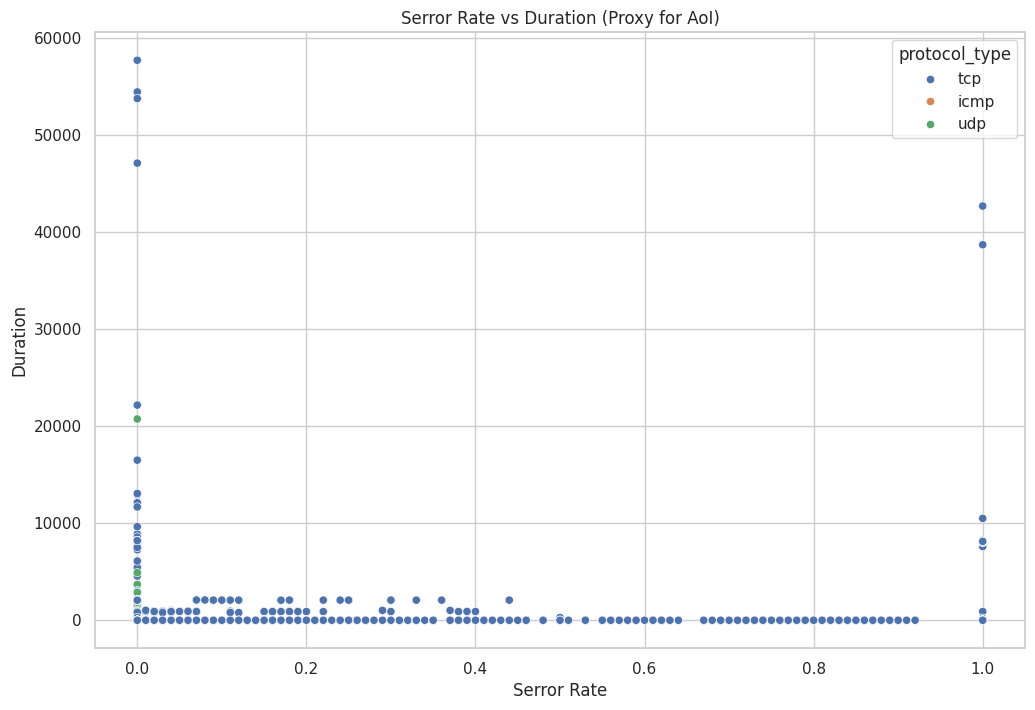

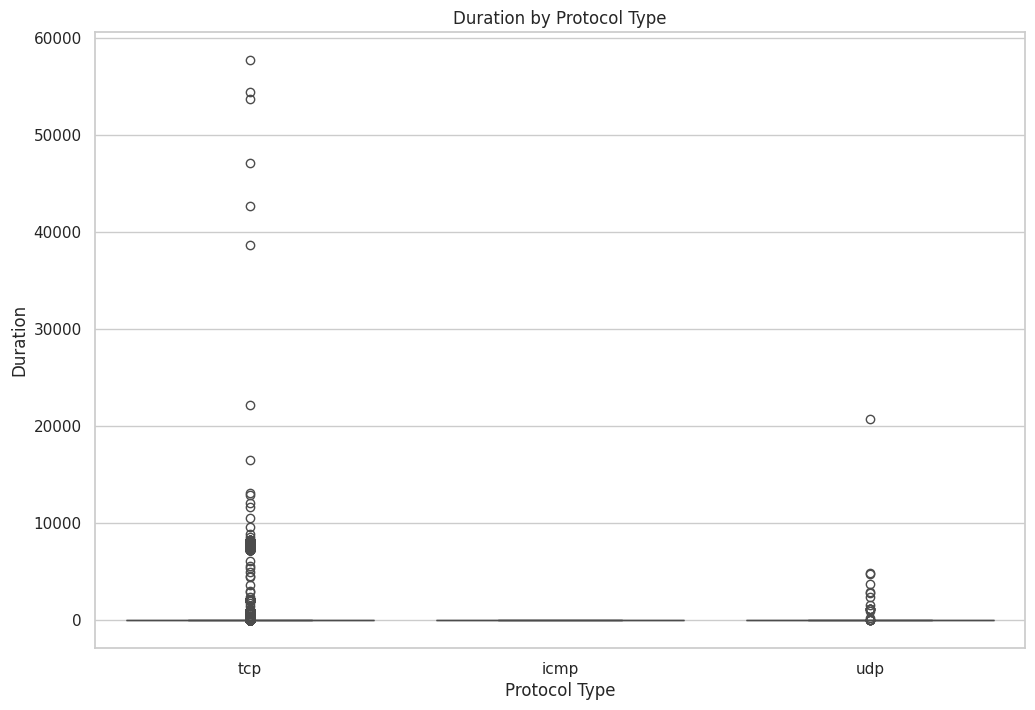

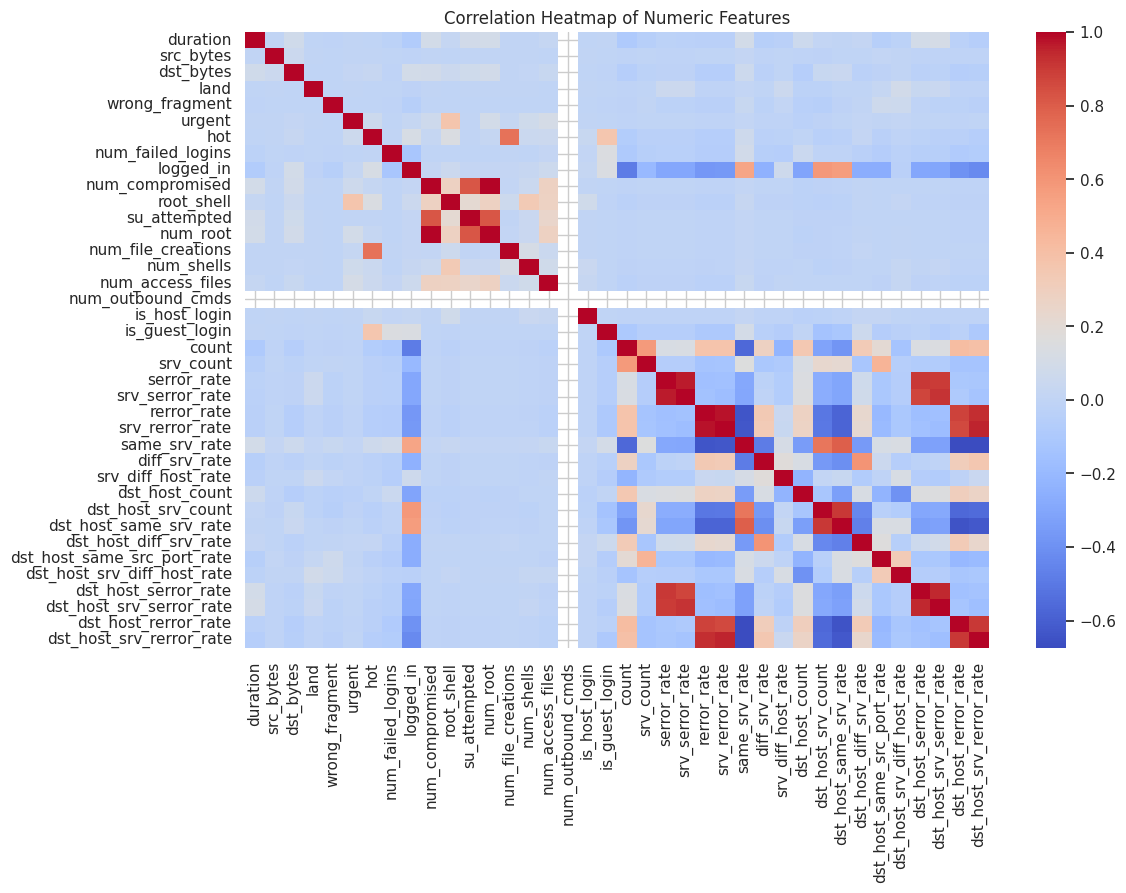

In [10]:
# Visualization 1: Scatter plot of serror_rate vs duration
plt.figure()
sns.scatterplot(data=df, x=features[0], y=aoi_col, hue=traffic_col)
plt.title('Serror Rate vs Duration (Proxy for AoI)')
plt.xlabel('Serror Rate')
plt.ylabel('Duration')
plt.savefig('scatter_plot.png')
plt.show()

# Visualization 2: Box plot of duration by protocol_type
plt.figure()
sns.boxplot(data=df, x=traffic_col, y=aoi_col)
plt.title('Duration by Protocol Type')
plt.xlabel('Protocol Type')
plt.ylabel('Duration')
plt.savefig('box_plot.png')
plt.show()

# Visualization 3: Correlation heatmap
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure()
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.savefig('heatmap.png')
plt.show()

In [13]:
# Machine Learning
X = df[features]
y = df[aoi_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Performance:")
print(f"MSE: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Model Performance:
MSE: 1377593.1010
R-squared: 0.3583



Feature Importance:
                Feature  Importance
0           serror_rate    0.670435
2  dst_host_serror_rate    0.286983
1           rerror_rate    0.042583


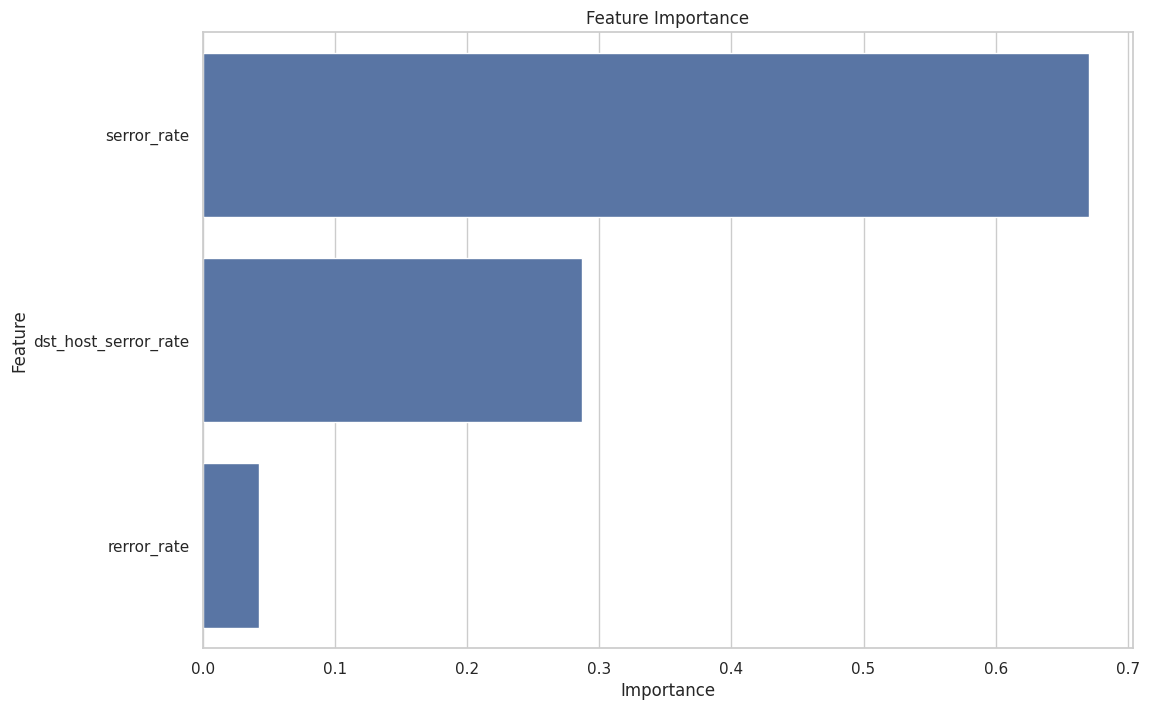


Hypothetical Predictions:
Config 1: Predicted Duration = 29.3208
Config 2: Predicted Duration = 0.0000
Config 3: Predicted Duration = 74.0594

Results for report:
{'MSE': 1377593.1010248412, 'R-squared': 0.35826981047564666, 'Feature Importance': {'Feature': {0: 'serror_rate', 2: 'dst_host_serror_rate', 1: 'rerror_rate'}, 'Importance': {0: 0.6704347695804149, 2: 0.28698265533516903, 1: 0.04258257508441609}}, 'Hypothetical Predictions': [29.320782550782557, 0.0, 74.05943530479146]}


In [14]:
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

plt.figure()
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.savefig('feature_importance.png')
plt.show()

# Hypothetical predictions
new_configs = pd.DataFrame([
    [0.1, 0.05, 0.1],
    [0.5, 0.2, 0.3],
    [0.0, 0.0, 0.0]
], columns=features)
new_configs_scaled = scaler.transform(new_configs)
predictions = rf.predict(new_configs_scaled)
print("\nHypothetical Predictions:")
for i, pred in enumerate(predictions):
    print(f"Config {i+1}: Predicted Duration = {pred:.4f}")

results = {
    'MSE': mse,
    'R-squared': r2,
    'Feature Importance': feature_importance.to_dict(),
    'Hypothetical Predictions': predictions.tolist()
}
print("\nResults for report:")
print(results)